In [91]:
import numpy as np
import pandas as pd

In [92]:
df = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': ['a', 'b', 'a', 'b', 'c']})

df

,A,B
0,1,a
1,2,b
2,3,a
3,4,b
4,5,c


In [93]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df.loc[:, 'B'])
le.transform(df.loc[:, 'B'])

array([0, 1, 0, 1, 2])

In [94]:
# 上の数字に書く文字が対応している

df['B'].values

array(['a', 'b', 'a', 'b', 'c'], dtype=object)

In [95]:
# B列の各値ごとに列を作成、0か1を表示する

pd.get_dummies(df.loc[:, 'B'], prefix = 'ohe')

,ohe_a,ohe_b,ohe_c
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,0,1


In [96]:
df = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [100, 200, 400, 500, 800]})

df

,A,B
0,1,100
1,2,200
2,3,400
3,4,500
4,5,800


In [97]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

stdsc.fit(df)
stdsc.transform(df)

array([[-1.41421356, -1.22474487],
       [-0.70710678, -0.81649658],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.40824829],
       [ 1.41421356,  1.63299316]])

In [98]:
from sklearn.preprocessing import MinMaxScaler

mmsc = MinMaxScaler()

mmsc.fit(df)
mmsc.transform(df)

array([[0.        , 0.        ],
       [0.25      , 0.14285714],
       [0.5       , 0.42857143],
       [0.75      , 0.57142857],
       [1.        , 1.        ]])

In [99]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [100]:
# 目的変数をラベルエンコーディング（0, 1, 2）などにしておけば、簡単に決定木で分類ができる
# なので、エンコーディングやワンホットは、目的変数を分類できるようにするための処理である

y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1,
       1, 2, 1, 0, 2, 2, 0, 1, 0, 1, 0, 2, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0,
       1])

In [101]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [102]:
y_pred = forest.predict(X_test)
y_pred

# 正例か負例という二値分類しか、混同行列によるモデル評価はできない
# 決定木も、多値分類の場合には、他の評価方法を模索する必要がある

array([1, 1, 2, 2, 0, 1, 2, 1, 0, 1, 1, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 1,
       1, 2, 1, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0,
       1])

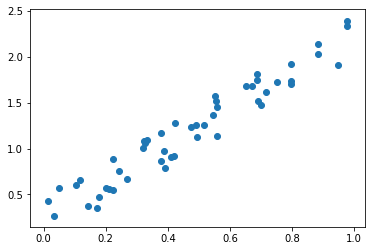

In [103]:
import matplotlib.pyplot as plt

X = np.random.random(size = 50)

Y = 2*X + 0.5 * np.random.rand(50)

fig, ax = plt.subplots()

ax.scatter(X, Y)

plt.show()

In [104]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_pca = pca.fit_transform(np.hstack((X[:, np.newaxis], Y[:, np.newaxis])))

In [105]:
np.hstack((X[:, np.newaxis], Y[:, np.newaxis]))

# 1列目が X、2列目が Y
# つまり X と Y の両方に対して主成分分析をした（2次元グラフに対する主成分分析）

array([[0.94699428, 1.90850857],
       [0.32789483, 1.05899844],
       [0.223593  , 0.55300262],
       [0.75144956, 1.72792265],
       [0.88386932, 2.13535822],
       [0.17028905, 0.35489427],
       [0.68547019, 1.74759318],
       [0.71602835, 1.61689245],
       [0.20950869, 0.56300541],
       [0.17852611, 0.47607706],
       [0.14166962, 0.37134318],
       [0.22379145, 0.88865248],
       [0.55700998, 1.14077031],
       [0.409651  , 0.90403965],
       [0.55055158, 1.56905596],
       [0.88299672, 2.03423743],
       [0.26801918, 0.6726458 ],
       [0.49081956, 1.25712854],
       [0.32345673, 1.07773182],
       [0.38811342, 0.96977481],
       [0.10282082, 0.59912171],
       [0.55785309, 1.45380328],
       [0.03263312, 0.26852069],
       [0.97656947, 2.39678105],
       [0.24265681, 0.7569533 ],
       [0.11583301, 0.65406166],
       [0.37866534, 1.16796339],
       [0.51660899, 1.25979145],
       [0.42331355, 1.27562281],
       [0.68650248, 1.80943064],
       [0.

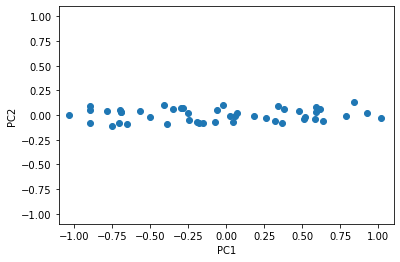

In [106]:
fig, ax = plt.subplots()

ax.scatter(X_pca[:, 0], X_pca[:, 1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)

plt.show()

In [107]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris= load_iris()
X, y = iris.data[:100, :], iris.target[:100]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

svc = SVC()

svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [108]:
y_pred = svc.predict(X_test)
y_pred

# サポートベクタマシンも単純に決定木と同じで、分類を行っているだけ
# 決定木もランダムフォレストもサポートベクタマシンも、コードの流れが線形回帰と同じである
# 教科書のサポートベクタの難しいコードは、可視化するための関数化とmatplotlibだけである、分類自体は簡単なコードだけだった

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0])

In [109]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [110]:
# 学習・テストデータ分割 → fit → predict と 性能評価を10回繰り返す

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC()

cross_val_score(svc, X, y, cv = 10, scoring = 'precision')

# データを100行までに指定しないと、エラーとなる（二値分類で二種類の花しか使えないため）
# 決定木は多値分類ができるけど、サポートベクタは二値分離しかできない

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [117]:
# 表から、退会したかどうかの情報だけをもとに、偽陽性率と真陽性率を計算する

fpr = np.array([0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 4, 5, 5, 6, 7, 8, 8, 8,  9, 10, 10, 11, 12, 12, 13, 14]) /14

tpr = np.array([0, 1, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 7, 7, 7, 7, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11]) / 11

tpr

array([0.        , 0.09090909, 0.18181818, 0.18181818, 0.27272727,
       0.27272727, 0.27272727, 0.36363636, 0.45454545, 0.54545455,
       0.54545455, 0.54545455, 0.63636364, 0.63636364, 0.63636364,
       0.63636364, 0.72727273, 0.81818182, 0.81818182, 0.81818182,
       0.90909091, 0.90909091, 0.90909091, 1.        , 1.        ,
       1.        ])

In [118]:
fpr

array([0.        , 0.        , 0.        , 0.07142857, 0.07142857,
       0.14285714, 0.21428571, 0.21428571, 0.21428571, 0.21428571,
       0.28571429, 0.35714286, 0.35714286, 0.42857143, 0.5       ,
       0.57142857, 0.57142857, 0.57142857, 0.64285714, 0.71428571,
       0.71428571, 0.78571429, 0.85714286, 0.85714286, 0.92857143,
       1.        ])

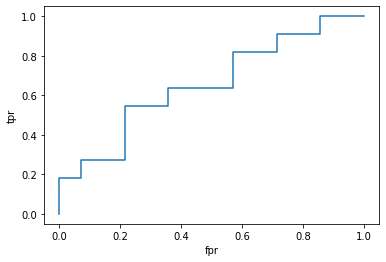

In [112]:
fig, ax = plt.subplots()

ax.step(fpr, tpr)

ax.set_xlabel('fpr')
ax.set_ylabel('tpr')

plt.show()

In [119]:
from sklearn.metrics import roc_curve

# 退会したかどうか
labels = np.array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0])

# 退会する確率
probs = np.array([0.98, 0.95, 0.9, 0.87, 0.85,
                 0.8, 0.75, 0.71, 0.63, 0.55,
                 0.51, 0.47, 0.43, 0.38, 0.35, 
                 0.31, 0.28, 0.24, 0.22, 0.19,
                  0.15, 0.12, 0.08, 0.04, 0.01])

In [120]:
fpr, tpr, threshold = roc_curve(labels, probs)

print('偽陽性率：', fpr)
print('真陽性率：', tpr)

偽陽性率： [0.         0.         0.         0.07142857 0.07142857 0.21428571
 0.21428571 0.35714286 0.35714286 0.57142857 0.57142857 0.71428571
 0.71428571 0.85714286 0.85714286 1.        ]
真陽性率： [0.         0.09090909 0.18181818 0.18181818 0.27272727 0.27272727
 0.54545455 0.54545455 0.63636364 0.63636364 0.81818182 0.81818182
 0.90909091 0.90909091 1.         1.        ]


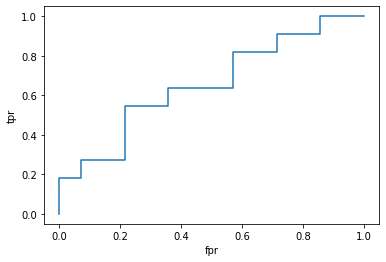

In [123]:
fig, ax = plt.subplots()

ax.step(fpr, tpr)

ax.set_xlabel('fpr')
ax.set_ylabel('tpr')

plt.show()

# 退会する・しないなどの予測確率が与えられているので
# その予測確率の精度が、どのくらいあるのかをROC・AUCで評価する（評価するのは、予測確率の精度）

In [124]:
from sklearn.metrics import roc_auc_score

roc_auc_score(labels, probs)

0.6558441558441558

In [125]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [129]:
iris = load_iris()

X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

param_grid = {'max_depth': [3, 4, 5]}

cv = GridSearchCV(clf, param_grid = param_grid, cv = 10)

# 1番良いパラメータを選定してfitしてくれる
cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None, param_grid={'max_depth': [3, 4, 5]},
             pre_dispatch='2*n_jobs', re

In [130]:
cv.best_params_

{'max_depth': 3}

In [131]:
cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [133]:
y_pred = cv.predict(X_test)
y_pred

array([1, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 0,
       2, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0,
       0])

In [134]:
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data

X = data[:100, [0, 2]]

In [136]:
# KMeans

from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, init = 'random', n_init = 10)

y_km = km.fit_predict(X)
y_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2])

In [139]:
# 階層的クラスタリング

from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')

labels = ac.fit_predict(X)

labels

# 簡単なplot方法はすうがくぶんか、もしくはネット、もしくはPythonではじめる機械学習からパクリましょう

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0], dtype=int64)

In [ ]:
# ハイパーパラメータがない　→　評価までを10回やる
# ハイパーパラメータがある　→　グリッドサーチかランダムサーチ＋交差検証（10回）してから、最適な予測値を出す